## Preprocessing the data

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalizing the images to the range of [0., 1.]
train_data = train_data/255.
test_data = test_data/255.

train_data = train_data.reshape(-1, 28,28, 1)
test_data = test_data.reshape(-1, 28,28, 1)

In [28]:
'''TRAIN_BUF = 60000
BATCH_SIZE = 100

TEST_BUF = 10000

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(TRAIN_BUF).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices(test_images).shuffle(TEST_BUF).batch(BATCH_SIZE)'''

'TRAIN_BUF = 60000\nBATCH_SIZE = 100\n\nTEST_BUF = 10000\n\ntrain_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(TRAIN_BUF).batch(BATCH_SIZE)\ntest_dataset = tf.data.Dataset.from_tensor_slices(test_images).shuffle(TEST_BUF).batch(BATCH_SIZE)'

Training set (images) shape: (60000, 28, 28, 1)
Test set (images) shape: (10000, 28, 28, 1)


Text(0.5, 1.0, '(Label: 0)')

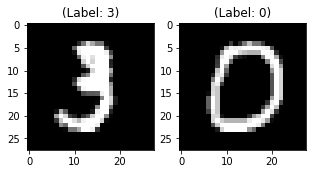

In [29]:
print("Training set (images) shape: {shape}".format(shape=train_data.shape))
print("Test set (images) shape: {shape}".format(shape=test_data.shape))
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(train_data[10], (28,28))
curr_lbl = train_labels[10]
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(curr_lbl) + ")")

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(test_data[10], (28,28))
curr_lbl = test_labels[10]
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(curr_lbl) + ")")

In [30]:
train_X,valid_X,train_ground,valid_ground = train_test_split(train_data,
                                                             train_data,
                                                             test_size=0.2,
                                                             random_state=13)

## Creating Autoencoder

In [31]:
batch_size = 128
epochs = 50
inChannel = 1
x, y = 28, 28
num_classes = 10

In [32]:
def gen_autoencoder():
    autoencoder = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        
        #here comes the decoder
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.UpSampling2D((2,2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.UpSampling2D((2,2)),
        tf.keras.layers.Conv2D(1, (3, 3), activation='relu', padding='same'),
    ])
    autoencoder.compile(loss='mean_squared_error', optimizer = tf.keras.optimizers.RMSprop())
    return autoencoder


## Training

In [33]:
autoencoder= gen_autoencoder()
autoencoder.summary()
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 7, 7, 128)         147584    
_________________________________________________________________
up_sampling2d_8 (UpSampling2 (None, 14, 14, 128)      

## Cheking Results

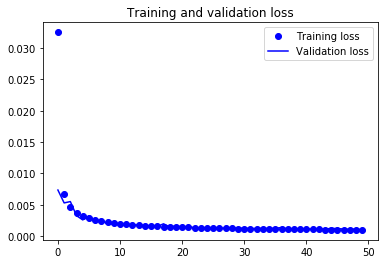

In [34]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
autoencoder.save_weights('autoencoder.h5')

In [60]:
new=autoencoder.predict(train_data[45].reshape(-1, 28,28, 1))

Training set (images) shape: (60000, 28, 28, 1)
Test set (images) shape: (10000, 28, 28, 1)


Text(0.5, 1.0, '(Label: 0)')

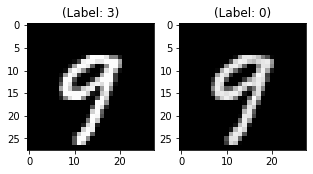

In [61]:
print("Training set (images) shape: {shape}".format(shape=train_data.shape))
print("Test set (images) shape: {shape}".format(shape=test_data.shape))
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(train_data[45], (28,28))
curr_lbl = train_labels[10]
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(curr_lbl) + ")")

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(new, (28,28))
curr_lbl = test_labels[10]
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(curr_lbl) + ")")

## Creating Encoder

In [80]:
train_X,valid_X,train_label,valid_label = train_test_split(train_data,train_labels,test_size=0.2,random_state=13)


In [81]:
def gen_encoder(autoencoder):
    encoder = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax'),
    ])
    
    for l1,l2 in zip(encoder.layers[:5],autoencoder.layers[0:5]):
        l1.set_weights(l2.get_weights())
        
    for layer in encoder.layers[0:5]:
        layer.trainable = False
        
    encoder.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

    
    return encoder
        

In [82]:
encoder=gen_encoder(autoencoder)

In [83]:
encoder.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
flatten_8 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)             

# Traning the Classifier

In [84]:
classify_train = encoder.fit(train_X, train_label, batch_size=64,epochs=10,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 22s 451us/sample - loss: 0.2726 - accuracy: 0.9369 - val_loss: 0.0951 - val_accuracy: 0.9733
Epoch 2/10
48000/48000 [==============================] - 24s 490us/sample - loss: 0.0687 - accuracy: 0.9811 - val_loss: 0.0688 - val_accuracy: 0.9802
Epoch 3/10
48000/48000 [==============================] - 24s 497us/sample - loss: 0.0425 - accuracy: 0.9881 - val_loss: 0.0635 - val_accuracy: 0.9806
Epoch 4/10
48000/48000 [==============================] - 24s 497us/sample - loss: 0.0279 - accuracy: 0.9935 - val_loss: 0.0569 - val_accuracy: 0.9828
Epoch 5/10
48000/48000 [==============================] - 24s 491us/sample - loss: 0.0182 - accuracy: 0.9960 - val_loss: 0.0566 - val_accuracy: 0.9830
Epoch 6/10
48000/48000 [==============================] - 22s 460us/sample - loss: 0.0114 - accuracy: 0.9983 - val_loss: 0.0520 - val_accuracy: 0.9850
Epoch 7/10
48000/48000 [====================

In [85]:
encoder.save_weights('autoencoder_classification.h5')


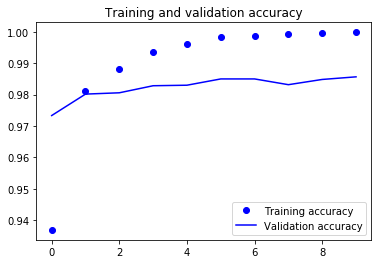

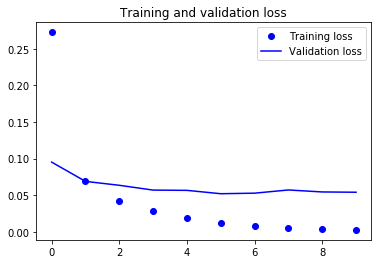

In [87]:
accuracy = classify_train.history['accuracy']
val_accuracy = classify_train.history['val_accuracy']
loss = classify_train.history['loss']
val_loss = classify_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()